# Artificial neural network (ANN) **Regression**

Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

Generating and plotting the data

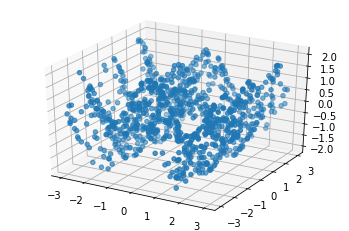

In [2]:
N = 1000
X = np.random.random((N, 2))*6 - 3 # in between (-3, +3)
y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1]) # makes a saddle shape

# note: in this script "y" will be the target, "y_hat" will be prediction

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)
plt.show()

Building the model

In [3]:
model = tf.keras.models.Sequential()

# Adding first layer which has 128 nodes.
model.add(tf.keras.layers.Dense(128, input_shape = (2,), activation = 'relu'))

# Adding Output layer which has 1 node.
model.add(tf.keras.layers.Dense(1))

Compiling the model

In [4]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.01),
              loss = 'mse')

Training the model

In [5]:
r = model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.9559
Epoch 2/100
32/32 [==============================] - 0s 937us/step - loss: 0.9794
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8933
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8896
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8659
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7450
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6614
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6696
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5915
Epoch 10/100
32/32 [==============================] - 0s 954us/step - loss: 0.6032
Epoch 11/100
32/32 [==============================] - 0s 975us/step - loss: 0.5625
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5647
Epoch 13/100
32/32 [===========

Plotting the loss per iteration

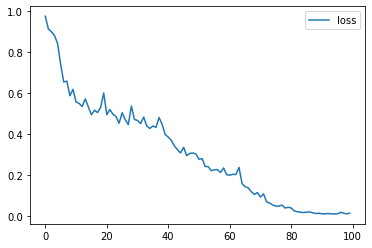

In [6]:
plt.plot(r.history['loss'], label = 'loss')
plt.legend()

Plotting the prediction surface

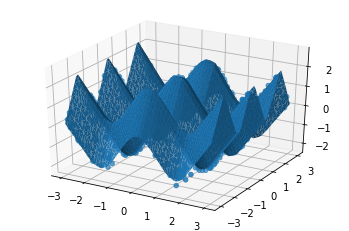

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

# Surface Plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
X_grid = np.vstack((xx.flatten(), yy.flatten())).T
y_hat = model.predict(X_grid).flatten()
ax.plot_trisurf(X_grid[:, 0], X_grid[:, 1], y_hat, linewidth = 0.2, antialiased = True)
plt.show()

Can it extrapolate?

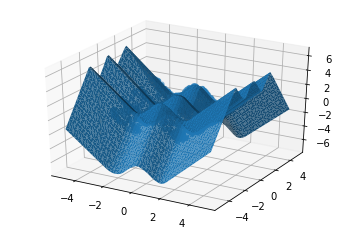

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

# Surface Plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
X_grid = np.vstack((xx.flatten(), yy.flatten())).T
y_hat = model.predict(X_grid).flatten()
ax.plot_trisurf(X_grid[:, 0], X_grid[:, 1], y_hat, linewidth = 0.2, antialiased = True)
plt.show()

# The regression model is “by construction” an interpolation model,
# and should not be used for extrapolation, unless this is properly justified.